## Простейшие приемы выявления и заполнения пропусков

In [1]:
# Подключение библиотек

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Выявление пропусков в столбцах
Пропущенные значения в столбцах DataFrame по умолчанию обозначаются **NaN**.

Не всегда наличие пропусков можно визуально обнаружить при выводе DataFrame: при выводе большого набора обычно отображается ограниченный фрагмент. Кроме того, для обоснования дальнеших действий необходимо не только понимать, имеются ли пропущенные значения в том или ином столбце, но и иметь количественные оценки (процент записей с пропусками).

Поэтому в Pandas существуют специальные методы для обнаружения пропущенных значений в столбцах DataFrame.

#### Метод **info()**
Метод **info()** класса DataFrame позволяет вывести сводную информацию о  DataFrame, включающую количество заполненных значений в столбцах.

[Документация метода](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)

Будем иллюстрировать работу методов на примере модельной таблицы, содержащей сведения об успеваемости (оценки, полученные студентами по трем дисциплинам)

In [2]:
# Создание таблицы

names = ['Иванов', 'Петров', 'Сидоров', 'Павлов']
marks1 = [5, 3, 4, 5]
marks2 = [4, 2, 4, 4]
marks3 = [3, 3, 5, 4]
df = pd.DataFrame({"ФИО": names, "Дисциплина_1": marks1, "Дисциплина_2": marks2, "Дисциплина_3": marks3})
df

,ФИО,Дисциплина_1,Дисциплина_2,Дисциплина_3
0,Иванов,5,4,3
1,Петров,3,2,3
2,Сидоров,4,4,5
3,Павлов,5,4,4


In [3]:
# Добавление двух строк c пропусками
new_lines = pd.DataFrame({"ФИО": ['Васильев', 'Мистер_Х'], "Дисциплина_1": [3, np.nan], "Дисциплина_3": [3, np.nan]})
df = pd.concat([df, new_lines], ignore_index=True)
df

,ФИО,Дисциплина_1,Дисциплина_2,Дисциплина_3
0,Иванов,5.0,4.0,3.0
1,Петров,3.0,2.0,3.0
2,Сидоров,4.0,4.0,5.0
3,Павлов,5.0,4.0,4.0
4,Васильев,3.0,NaN,3.0
5,Мистер_Х,NaN,NaN,NaN


In [4]:
# Вывод сводной информации по таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ФИО           6 non-null      object 
 1   Дисциплина_1  5 non-null      float64
 2   Дисциплина_2  4 non-null      float64
 3   Дисциплина_3  5 non-null      float64
dtypes: float64(3), object(1)
memory usage: 320.0+ bytes


Из всех столбцов только столбец "ФИО" не содержит пропусков: 6 значений non-null в 6 строках таблицы;

в столбце "Дисциплина_1" 5 значений non-null из 6 (1 пропущено);

в столбце "Дисциплина_2" 4 значения non-null из 6 (2 пропущено);

в столбце "Дисциплина_3" 5 значений non-null из 6 (1 пропущено).

#### Методы **isnull()** и **notnull()**
Методы **isnull()** и **notnull()** класса DataFrame позволяют определить, являются ли значения в таблице пропущенными/заполненными.

Методы возвращают таблицы булевских значений (маски исходной таблицы).
Это может быть полезно при реализации различной обработки таблиц.

Документация методов:

[isnull()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html)

[notnull()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notnull.html)

In [5]:
# Определение пропущенных значений
df.isnull()

,ФИО,Дисциплина_1,Дисциплина_2,Дисциплина_3
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,True,True,True


In [6]:
# Определение заполненных значений
df.notnull()

,ФИО,Дисциплина_1,Дисциплина_2,Дисциплина_3
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,False,True
5,True,False,False,False


In [7]:
# Определение пропущенных значений в выбранных столбцах
df[['Дисциплина_1', 'Дисциплина_2']].isnull()

,Дисциплина_1,Дисциплина_2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True
5,True,True


Комбинация методов isnull() и sum() позволяет получить информацию о количестве пропусков по столбцам



In [8]:
print("Количество пропусков по столбцам:")
df.isnull().sum()

Количество пропусков по столбцам:


ФИО             0
Дисциплина_1    1
Дисциплина_2    2
Дисциплина_3    1
dtype: int64

### Заполнение пропусков
#### Заполнение константным значением
Простейший способ заполнения пропусков - заполнение константным значением.

Выполняется с помощью метода **fillna()** класса DataFrame.

[Документация метода](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

In [9]:
# Заполнение пропусков значением 2 (несданный экзамен)

df_2 = df.fillna(2)   # пропуски ВО ВСЕХ столбцах заполняются одним и тем же значением 2
df_2

,ФИО,Дисциплина_1,Дисциплина_2,Дисциплина_3
0,Иванов,5.0,4.0,3.0
1,Петров,3.0,2.0,3.0
2,Сидоров,4.0,4.0,5.0
3,Павлов,5.0,4.0,4.0
4,Васильев,3.0,2.0,3.0
5,Мистер_Х,2.0,2.0,2.0


In [10]:
# Заполнение пропусков средним значением по столбцу (вычисление среднего - по заполненным значениям)

df_mean = df.fillna(df.mean(numeric_only=True))   # пропуски в каждом столбце заполняются средним значением по этому столбцу (в mean() по умолчанию axis=0 - по столбцам)
df_mean

,ФИО,Дисциплина_1,Дисциплина_2,Дисциплина_3
0,Иванов,5.0,4.0,3.0
1,Петров,3.0,2.0,3.0
2,Сидоров,4.0,4.0,5.0
3,Павлов,5.0,4.0,4.0
4,Васильев,3.0,3.5,3.0
5,Мистер_Х,4.0,3.5,3.6


In [11]:
# Заполнение пропусков медианным значением столбца (по заполненным значениям)

df_median = df.fillna(df.median(numeric_only=True))   # пропуски в каждом столбце заполняются медианным значением по этому столбцу
df_median

,ФИО,Дисциплина_1,Дисциплина_2,Дисциплина_3
0,Иванов,5.0,4.0,3.0
1,Петров,3.0,2.0,3.0
2,Сидоров,4.0,4.0,5.0
3,Павлов,5.0,4.0,4.0
4,Васильев,3.0,4.0,3.0
5,Мистер_Х,4.0,4.0,3.0


Указанные методы заполнения можно применять к отдельным столбцам, если для разных столбцов требуется различная обработка (что, как правило, и бывает на практике).

Следует иметь в виду, что любой метод заполнения пропусков может привести к изменениям описательных статистик выборки.

In [12]:
# Описательные статистики исходной таблицы с пропусками (вычислены по заполненным значениям)
df.describe()

,Дисциплина_1,Дисциплина_2,Дисциплина_3
count,5.0,4.0,5.000000
mean,4.0,3.5,3.600000
std,1.0,1.0,0.894427
min,3.0,2.0,3.000000
25%,3.0,3.5,3.000000
50%,4.0,4.0,3.000000
75%,5.0,4.0,4.000000
max,5.0,4.0,5.000000


In [13]:
# Описательные статистики после заполнения пропусков значением 2
df_2.describe()

# средние значения заметно уменьшились, а разброс увеличился

,Дисциплина_1,Дисциплина_2,Дисциплина_3
count,6.000000,6.000000,6.000000
mean,3.666667,3.000000,3.333333
std,1.211060,1.095445,1.032796
min,2.000000,2.000000,2.000000
25%,3.000000,2.000000,3.000000
50%,3.500000,3.000000,3.000000
75%,4.750000,4.000000,3.750000
max,5.000000,4.000000,5.000000


In [14]:
# Описательные статистики после заполнения пропусков средним значением
df_mean.describe()

# средние значения не изменились, а разброс заметно уменьшился

,Дисциплина_1,Дисциплина_2,Дисциплина_3
count,6.000000,6.000000,6.0
mean,4.000000,3.500000,3.6
std,0.894427,0.774597,0.8
min,3.000000,2.000000,3.0
25%,3.250000,3.500000,3.0
50%,4.000000,3.750000,3.3
75%,4.750000,4.000000,3.9
max,5.000000,4.000000,5.0


In [15]:
# Описательные статистики после заполнения пропусков медианным значением
df_median.describe()

,Дисциплина_1,Дисциплина_2,Дисциплина_3
count,6.000000,6.000000,6.00000
mean,4.000000,3.666667,3.50000
std,0.894427,0.816497,0.83666
min,3.000000,2.000000,3.00000
25%,3.250000,4.000000,3.00000
50%,4.000000,4.000000,3.00000
75%,4.750000,4.000000,3.75000
max,5.000000,4.000000,5.00000


#### Заполнение случайным значением в соответствии с заданным распределением вероятностей

Генерацию случайных значений признака, используемых для заполнения пропусков, можно реализовать с помощью метода **random.choice()** из библиотеки Numpy.

Продолжим рассмотрение примера с успеваемостью.

Предположим, что вероятности получения оценок 2, 3, 4 и 5 оцениваются, соответственно, как 0.2, 0.3, 0.3 и 0.2. Нужно заполнить пропуски случайными значениями, сгенерированными в соответствии с этим законом распределения.

In [16]:
# Закон распределения для замены пропусков на случайные значения
values = [2, 3, 4, 5]                # значения для замены
pvalues = [0.2, 0.3, 0.3, 0.2]       # вероятности значений

In [17]:
# Создание копии исходной таблицы (заполнение будет выполняться в копии)
df_rand = df.copy()

In [18]:
df_rand

,ФИО,Дисциплина_1,Дисциплина_2,Дисциплина_3
0,Иванов,5.0,4.0,3.0
1,Петров,3.0,2.0,3.0
2,Сидоров,4.0,4.0,5.0
3,Павлов,5.0,4.0,4.0
4,Васильев,3.0,NaN,3.0
5,Мистер_Х,NaN,NaN,NaN


In [19]:
# Цикл: обработка пропусков по каждому столбцу отдельно
for col in df_rand.columns:
  if df_rand.isnull().sum()[col]>0:                                      # если в текущем столбце имеются пропуски
    nans = df_rand[col].isnull()                                             # определение списка строк, где находятся пропуски
    repl = np.random.choice(values, df_rand.isnull().sum()[col], p=pvalues)  # генерация случайных значений для текущего столбца (по количеству пропусков в этом столбце)
    print(repl)                                                              # вывод сгенерированных значений (в иллюстративных целях)
    df_rand.loc[nans, col] = repl                                            # подстановка сгенерированных значений вместо пропущенных
df_rand

[2]
[3 5]
[4]


,ФИО,Дисциплина_1,Дисциплина_2,Дисциплина_3
0,Иванов,5.0,4.0,3.0
1,Петров,3.0,2.0,3.0
2,Сидоров,4.0,4.0,5.0
3,Павлов,5.0,4.0,4.0
4,Васильев,3.0,3.0,3.0
5,Мистер_Х,2.0,5.0,4.0


### Удаление записей с пропущенными значениями

Выполняется с помощью метода **dropna()** класса DataFrame.

Подмножество столбцов для обработки можно указать с помощью параметра **subset** (по умолчанию обработка применяется ко всем столбцам).

[Документация метода](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [20]:
# Создание двух копий исходной таблицы (удаление будет выполняться в копиях)
df_drop_1 = df.copy()
df_drop_2 = df.copy()

In [21]:
df_drop_1

,ФИО,Дисциплина_1,Дисциплина_2,Дисциплина_3
0,Иванов,5.0,4.0,3.0
1,Петров,3.0,2.0,3.0
2,Сидоров,4.0,4.0,5.0
3,Павлов,5.0,4.0,4.0
4,Васильев,3.0,NaN,3.0
5,Мистер_Х,NaN,NaN,NaN


In [22]:
# Удаление записей с пропущенными значениями хотя бы в одном столбце
df_drop_1.dropna(inplace=True)

df_drop_1

,ФИО,Дисциплина_1,Дисциплина_2,Дисциплина_3
0,Иванов,5.0,4.0,3.0
1,Петров,3.0,2.0,3.0
2,Сидоров,4.0,4.0,5.0
3,Павлов,5.0,4.0,4.0


In [23]:
# Удаление записей с пропущенными значениями в столбце "Дисциплина_3"
df_drop_2.dropna(subset=['Дисциплина_3'], inplace=True)

df_drop_2

,ФИО,Дисциплина_1,Дисциплина_2,Дисциплина_3
0,Иванов,5.0,4.0,3.0
1,Петров,3.0,2.0,3.0
2,Сидоров,4.0,4.0,5.0
3,Павлов,5.0,4.0,4.0
4,Васильев,3.0,NaN,3.0


## Пример обработки пропусков в наборе данных о клиентах банка

Вернемся к изучению набора данных о клиентах одного из европейских банков, использовавшегося ранее при исследовании статистических взаимосвязей признаков.

In [24]:
# Импорт данных из файла и вывод первых 10 записей

frame = pd.read_csv('/content/Данные_клиентов.txt', sep='\t', header=0)
frame.head(10)

,ID записи,Возраст,Направление деятельности,Семейное положение,Образование,Дефолты,Ипотека,Потребительский кредит,Тип звонка,Месяц последнего контакта,...,"Продолжительность разговора, сек.",Текущее число контактов,"Последний контакт, дни",Предыдущее число контактов,Изменение уровня занятости,Индекс цен,Индекс доверия,Индекс Euribor 3m,Число сотрудников,Отклик
0,1,56,Домработница,Состоит в браке,Основное 4 года,Нет,Нет,Нет,Стационарный,май,...,261,1,NaN,0,"1,1","93,994","-36,4","4,857",5191,Нет
1,2,57,Сфера услуг,Состоит в браке,Средняя школа,NaN,Нет,Нет,Стационарный,май,...,149,1,NaN,0,"1,1","93,994","-36,4","4,857",5191,Нет
2,3,37,Сфера услуг,Состоит в браке,Средняя школа,Нет,Да,Нет,Стационарный,май,...,226,1,NaN,0,"1,1","93,994","-36,4","4,857",5191,Нет
3,4,40,"Топ-менеджмент, Администрация",Состоит в браке,Основное 6 лет,Нет,Нет,Нет,Стационарный,май,...,151,1,NaN,0,"1,1","93,994","-36,4","4,857",5191,Нет
4,5,56,Сфера услуг,Состоит в браке,Средняя школа,Нет,Нет,Да,Стационарный,май,...,307,1,NaN,0,"1,1","93,994","-36,4","4,857",5191,Нет
5,6,45,Сфера услуг,Состоит в браке,Основное 9 лет,NaN,Нет,Нет,Стационарный,май,...,198,1,NaN,0,"1,1","93,994","-36,4","4,857",5191,Нет
6,7,59,"Топ-менеджмент, Администрация",Состоит в браке,Профессиональное,Нет,Нет,Нет,Стационарный,май,...,139,1,NaN,0,"1,1","93,994","-36,4","4,857",5191,Нет
7,8,41,Синий воротничок,Состоит в браке,Нет данных,NaN,Нет,Нет,Стационарный,май,...,217,1,NaN,0,"1,1","93,994","-36,4","4,857",5191,Нет
8,9,24,Специалист,Холост/Не замужем,Профессиональное,Нет,Да,Нет,Стационарный,май,...,380,1,NaN,0,"1,1","93,994","-36,4","4,857",5191,Нет
9,10,25,Сфера услуг,Холост/Не замужем,Средняя школа,Нет,Да,Нет,Стационарный,май,...,50,1,NaN,0,"1,1","93,994","-36,4","4,857",5191,Нет


In [25]:
# Вывод размерности фрейма
frame.shape

(41188, 22)

In [26]:
# Общая информация о фрейме
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID записи                          41188 non-null  int64  
 1   Возраст                            41188 non-null  int64  
 2   Направление деятельности           40858 non-null  object 
 3   Семейное положение                 41108 non-null  object 
 4   Образование                        41188 non-null  object 
 5   Дефолты                            32591 non-null  object 
 6   Ипотека                            40198 non-null  object 
 7   Потребительский кредит             40198 non-null  object 
 8   Тип звонка                         41188 non-null  object 
 9   Месяц последнего контакта          41188 non-null  object 
 10  День недели последнего контакта    41188 non-null  object 
 11  Результат предыдущей кампании      41188 non-null  obj

Видим, что есть столбцы с пропусками.

Определим количество пропусков (в абсолютных значениях и в процентном соотношении от числа записей).

In [27]:
# Количество пропусков по столбцам
frame.isnull().sum()

ID записи                                0
Возраст                                  0
Направление деятельности               330
Семейное положение                      80
Образование                              0
Дефолты                               8597
Ипотека                                990
Потребительский кредит                 990
Тип звонка                               0
Месяц последнего контакта                0
День недели последнего контакта          0
Результат предыдущей кампании            0
Продолжительность разговора, сек.        0
Текущее число контактов                  0
Последний контакт, дни               39673
Предыдущее число контактов               0
Изменение уровня занятости               0
Индекс цен                               0
Индекс доверия                           0
Индекс Euribor 3m                        0
Число сотрудников                        0
Отклик                                   0
dtype: int64

In [28]:
# Определение процента записей с пропусками для каждого столбца и тип данных столбца
for el in frame.columns:
    n = frame.isnull().sum()[el]
    if n > 0:
        proc = 100*n/frame.shape[0]
        print(el.ljust(35), '{0:5}{1:8.2f}   '.format(n, proc), str(frame.dtypes[el]))

Направление деятельности              330    0.80    object
Семейное положение                     80    0.19    object
Дефолты                              8597   20.87    object
Ипотека                               990    2.40    object
Потребительский кредит                990    2.40    object
Последний контакт, дни              39673   96.32    float64


Столбец **Последний контакт, дни** содержит более 96% пропущенных значений, поэтому его следует признать непригодным для анализа.

Этот столбец нужно исключить из набора данных, подлежащего дальнейшей обработке.

In [29]:
frame = frame.drop('Последний контакт, дни', axis = 1)

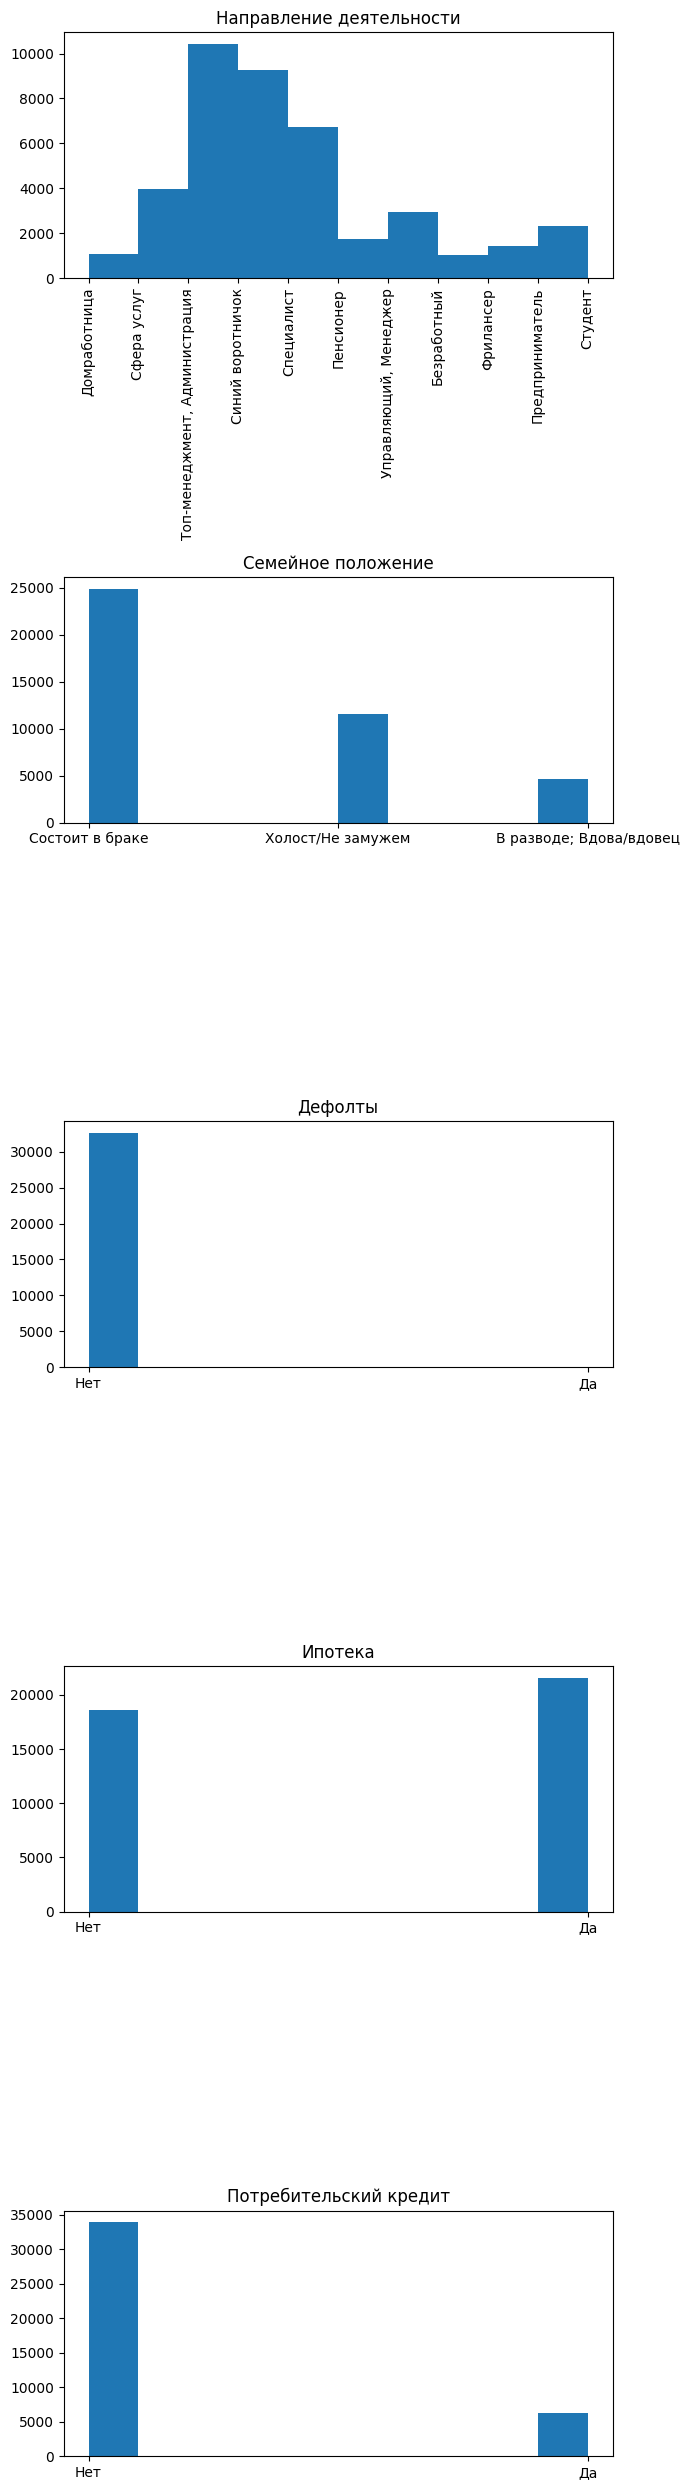

In [30]:
# Построение гистограмм категориальных признаков с пропусками (без учета пропущенных значений)
# для получения общего представления о распределениях значений признаков

# Формирование списка признаков
list_cat = []
for el in frame.columns:
    if (frame.isnull().sum()[el] > 0) and (str(frame.dtypes[el]) == 'object'):
        list_cat.append(el)

# Построение гистограмм
fig, axes = plt.subplots(nrows = len(list_cat), ncols = 1, figsize = (7, 25))
for i, el in enumerate(list_cat):
    bin = len(frame[el].unique())-1
    if bin > 3:
        rot = 90
    else:
        rot = 0
    frame[el].hist(grid = False, xrot = rot, ax = axes[i])
    axes[i].set_title(el)
fig.tight_layout()

Число пропусков в столбцах **Ипотека** и **Потребительский кредит** совпадает. Возможно, появление пропущенных значений в этих столбцах взаимосвязано. Следует изучить этот вопрос.

In [31]:
# Определение частоты совместного появления пропусков в столбцах "Ипотека" и "Потребительский кредит"

cnt = frame[(frame['Ипотека'].isnull())&(frame['Потребительский кредит'].isnull())].shape[0]
print('Число совместного появления пропусков в обоих столбцах', cnt)

Число совместного появления пропусков в обоих столбцах 990


In [32]:
# Определение частоты появления пропусков только в одном из двух столбцов

cnt1 = frame[(frame['Ипотека'].isnull())&(frame['Потребительский кредит'].notnull())].shape[0]
print('Число появления пропусков только в столбце "Ипотека"', cnt1)
cnt2 = frame[(frame['Ипотека'].notnull())&(frame['Потребительский кредит'].isnull())].shape[0]
print('Число появления пропусков только в столбце "Потребительский кредит"', cnt2)

Число появления пропусков только в столбце "Ипотека" 0
Число появления пропусков только в столбце "Потребительский кредит" 0


Пропуски в этих столбцах появляются только совместно.

Следующий вопрос: имеется ли связь между появлением пропусков в этих столбцах и значениями в других столбцах (можно ли предполагать случайный механизм образования пропусков)?

In [33]:
# Исследование зависимости между пропусками в столбцах "Ипотека" и "Потребительский кредит" и распределением значений признака
# "Возраст" (среднее значение и среднее квадратическое отклонение)

# Среднее значение и с.к.о. возраста с учетом записей с пропусками в столбцах "Ипотека" и "Потребительский кредит"
m = frame['Возраст'].mean()
s = frame['Возраст'].std(ddof = 1)
print('С учетом записей с пропусками:')
print(f'среднее значение {m}; среднее квадратическое отклонение {s} \n')

# Среднее значение и с.к.о. возраста без учета записей с пропусками в столбцах "Ипотека" и "Потребительский кредит"
m = frame[frame['Ипотека'].notnull()]['Возраст'].mean()   # можно учитывать только ипотеку, т. к. пропуски совместные
s = frame[frame['Ипотека'].notnull()]['Возраст'].std(ddof = 1)
print('Без учета записей с пропусками:')
print(f'среднее значение {m}; среднее квадратическое отклонение {s}')

С учетом записей с пропусками:
среднее значение 40.02406040594348; среднее квадратическое отклонение 10.421249980934048 

Без учета записей с пропусками:
среднее значение 40.025847057067516; среднее квадратическое отклонение 10.422342557820642


In [34]:
# Исследование зависимости между пропусками в столбцах "Ипотека" и "Потребительский кредит" и распределением значений признака
# "Образование" (рапределение частот)

# Распределение частот с учетом записей с пропусками в столбцах "Ипотека" и "Потребительский кредит"
print('С учетом записей с пропусками:')
print(frame['Образование'].value_counts()/frame.shape[0], '\n')

# Распределение частот без учета записей с пропусками в столбцах "Ипотека" и "Потребительский кредит"
print('Без учета записей с пропусками:')
print(frame[frame['Ипотека'].notnull()]['Образование'].value_counts()/frame.shape[0])

С учетом записей с пропусками:
Образование
Высшее              0.295426
Средняя школа       0.231014
Основное 9 лет      0.146766
Профессиональное    0.127294
Основное 4 года     0.101389
Основное 6 лет      0.055647
Нет данных          0.042027
Без образования     0.000437
Name: count, dtype: float64 

Без учета записей с пропусками:
Образование
Высшее              0.288701
Средняя школа       0.225673
Основное 9 лет      0.143100
Профессиональное    0.124259
Основное 4 года     0.098548
Основное 6 лет      0.054191
Нет данных          0.041056
Без образования     0.000437
Name: count, dtype: float64


In [35]:
# Исследование зависимости между пропусками в столбцах "Ипотека" и "Потребительский кредит" и распределением значений признака
# "Отклик" (рапределение частот)

# Распределение частот с учетом записей с пропусками в столбцах "Ипотека" и "Потребительский кредит"
print('С учетом записей с пропусками:')
print(frame['Отклик'].value_counts()/frame.shape[0], '\n')

# Распределение частот без учета записей с пропусками в столбцах "Ипотека" и "Потребительский кредит"
print('Без учета записей с пропусками:')
print(frame[frame['Ипотека'].notnull()]['Отклик'].value_counts()/frame.shape[0])

С учетом записей с пропусками:
Отклик
Нет    0.887346
Да     0.112654
Name: count, dtype: float64 

Без учета записей с пропусками:
Отклик
Нет    0.865908
Да     0.110056
Name: count, dtype: float64


**Выводы:**
- Пропуски в столбцах **Ипотека** и **Потребительский кредит** появляются только совместно.
- Зависимость между пропусками в этих столбцах и распределением значений признаков в столбцах **Возраст** и **Образование** не просматривается; заметного изменения распределения значений столбца **Отклик**, тоже нет.
- Из двух предыдущих пунктов: скорее всего, причиной пропусков являются технические проблемы передачи информации, следовательно, эти пропуски можно отнести к категории совершенно случайных.
- Количество пропусков в этих столбцах менее 3% от общего числа записей.
- С учетом всех пунктов, допустимой стратегией обработки пропусков является удаление записей с пропускам в столбцах **Ипотека** и **Потребительский кредит** (990 записей).

In [36]:
# Удаление записей с пропусками в столбцах "Ипотека" и "Потребительский кредит"
# Можно использовать метод dropna()
# Здесь предлагается способ удаления, который позволит впоследствии проконтролировать (по индексам), какие именно строки удалились

indexes = frame[frame['Ипотека'].isnull()].index    # Индексы строк, подлежащих удалению
frame = frame.drop(indexes)

In [37]:
# Вывод информации о количестве пропусков в полученном наборе (для контроля и дальнейшего анализа)

frame.isnull().sum()

ID записи                               0
Возраст                                 0
Направление деятельности              325
Семейное положение                     79
Образование                             0
Дефолты                              8370
Ипотека                                 0
Потребительский кредит                  0
Тип звонка                              0
Месяц последнего контакта               0
День недели последнего контакта         0
Результат предыдущей кампании           0
Продолжительность разговора, сек.       0
Текущее число контактов                 0
Предыдущее число контактов              0
Изменение уровня занятости              0
Индекс цен                              0
Индекс доверия                          0
Индекс Euribor 3m                       0
Число сотрудников                       0
Отклик                                  0
dtype: int64

Пропуски в столбце **Направление деятельности** можно заполнить случайными значениями, сгенерированными в соответствии с эмпирическим распределением этого признака

In [38]:
# Определение эмпирического распределения значений признака "Направление деятельности" (без учета пропусков) -
# получение списков значений и относительных частот

print(frame['Направление деятельности'].value_counts(), '\n')                  # Статистическое распределение (значения признака и частоты)

values = list(frame['Направление деятельности'].value_counts().index)          # Список значений признака
print(values, '\n')
pvalues = list(frame['Направление деятельности'].value_counts())/np.array(frame['Направление деятельности'].count())
print(pvalues)                                                                 # Список относительных частот значений признака - статистических вероятностей

Направление деятельности
Топ-менеджмент, Администрация    10195
Синий воротничок                  9014
Специалист                        6596
Сфера услуг                       3868
Управляющий, Менеджер             2853
Пенсионер                         1676
Предприниматель                   1420
Фрилансер                         1381
Домработница                      1031
Безработный                        987
Студент                            852
Name: count, dtype: int64 

['Топ-менеджмент, Администрация', 'Синий воротничок', 'Специалист', 'Сфера услуг', 'Управляющий, Менеджер', 'Пенсионер', 'Предприниматель', 'Фрилансер', 'Домработница', 'Безработный', 'Студент'] 

[0.25568681 0.22606777 0.16542523 0.097008   0.07155218 0.04203346
 0.03561307 0.03463497 0.0258571  0.02475359 0.02136784]


In [39]:
# Генерация массива случайных значений признака в соответствии с полученным эмпирическим законом

repl = np.random.choice(values, frame.isnull().sum()['Направление деятельности'], p=pvalues)
print(repl[:20])

['Синий воротничок' 'Синий воротничок' 'Синий воротничок' 'Домработница'
 'Пенсионер' 'Специалист' 'Синий воротничок'
 'Топ-менеджмент, Администрация' 'Топ-менеджмент, Администрация'
 'Фрилансер' 'Специалист' 'Специалист' 'Топ-менеджмент, Администрация'
 'Специалист' 'Топ-менеджмент, Администрация' 'Специалист' 'Специалист'
 'Синий воротничок' 'Топ-менеджмент, Администрация'
 'Топ-менеджмент, Администрация']


In [40]:
# Сохранение индексов записей с пропусками в столбце "Направление деятельности" для последующего контроля заполнения

ind = frame[frame['Направление деятельности'].isnull()].index
print(ind[:20])

Index([  35,   73,   91,  144,  299,  303,  343,  388,  428,  476,  483,  507,
        582,  584,  794,  878,  885,  961, 1131, 1165],
      dtype='int64')


In [41]:
# Заполнение пропусков в столбце сгенерированными случайными значениями

nans = frame['Направление деятельности'].isnull()
frame.loc[nans, 'Направление деятельности'] = repl

In [42]:
# Контроль заполнения пропусков
frame.loc[ind[:20], ['Направление деятельности']]

,Направление деятельности
35,Синий воротничок
73,Синий воротничок
91,Синий воротничок
144,Домработница
299,Пенсионер
303,Специалист
343,Синий воротничок
388,"Топ-менеджмент, Администрация"
428,"Топ-менеджмент, Администрация"
476,Фрилансер


In [43]:
# Вывод информации о количестве пропусков в полученном наборе (для контроля и дальнейшего анализа)
frame.isnull().sum()

ID записи                               0
Возраст                                 0
Направление деятельности                0
Семейное положение                     79
Образование                             0
Дефолты                              8370
Ипотека                                 0
Потребительский кредит                  0
Тип звонка                              0
Месяц последнего контакта               0
День недели последнего контакта         0
Результат предыдущей кампании           0
Продолжительность разговора, сек.       0
Текущее число контактов                 0
Предыдущее число контактов              0
Изменение уровня занятости              0
Индекс цен                              0
Индекс доверия                          0
Индекс Euribor 3m                       0
Число сотрудников                       0
Отклик                                  0
dtype: int64

Изучим распределение значений в столбце **Семейное положение** (по заполненным значениям)

In [44]:
print(frame['Семейное положение'].value_counts()/frame.shape[0], '\n')

Семейное положение
Состоит в браке            0.605503
Холост/Не замужем          0.280810
В разводе; Вдова/вдовец    0.111722
Name: count, dtype: float64 



У данного признака имеется явно выраженная мода. При этом общее количество пропущенных значений менее 1%.

Это может считаться аргументами в пользу заполнения пропусков модальным значением (хотя такое решение и не однозначно).

In [45]:
# Сохранение модального значения
moda = frame['Семейное положение'].mode()

# Сохранение индексов записей с пропусками для последующего контроля заполнения
ind = frame[frame['Семейное положение'].isnull()].index
print(ind)

Index([   40,   390,   413,  1493,  1608,  3167,  3478,  4196,  4344,  4454,
        6376,  7145,  7368,  7573,  7632,  9487,  9714, 10547, 10962, 11355,
       11679, 11789, 11883, 12028, 14788, 14789, 15134, 15202, 15289, 16662,
       17344, 17421, 17652, 20603, 20604, 20761, 20777, 20779, 22262, 22269,
       25778, 26219, 26509, 26551, 26747, 26973, 26975, 27835, 28034, 29200,
       29772, 30477, 30522, 30524, 30952, 31315, 31349, 32009, 32663, 32808,
       32811, 32815, 32999, 33315, 33353, 34410, 34423, 35876, 36316, 36380,
       36434, 37258, 37387, 37425, 38550, 38579, 39322, 39323, 40857],
      dtype='int64')


In [46]:
# Заполнение пропусков модальным значением
frame['Семейное положение'].fillna(moda[0], inplace = True)

In [47]:
frame.loc[ind, ['Семейное положение']]  # Контроль заполнения пропусков

,Семейное положение
40,Состоит в браке
390,Состоит в браке
413,Состоит в браке
1493,Состоит в браке
1608,Состоит в браке
...,...
38550,Состоит в браке
38579,Состоит в браке
39322,Состоит в браке
39323,Состоит в браке


In [48]:
# Вывод информации о количестве пропусков в полученном наборе (для контроля и дальнейшего анализа)
frame.isnull().sum()

ID записи                               0
Возраст                                 0
Направление деятельности                0
Семейное положение                      0
Образование                             0
Дефолты                              8370
Ипотека                                 0
Потребительский кредит                  0
Тип звонка                              0
Месяц последнего контакта               0
День недели последнего контакта         0
Результат предыдущей кампании           0
Продолжительность разговора, сек.       0
Текущее число контактов                 0
Предыдущее число контактов              0
Изменение уровня занятости              0
Индекс цен                              0
Индекс доверия                          0
Индекс Euribor 3m                       0
Число сотрудников                       0
Отклик                                  0
dtype: int64

Пропущенные значения остались только в столбце **Дефолты**.

Представляется, что значения в этом столбце являются важными с точки зрения принятия банком решений о политике в отношении клиента. Кроме того, в столбце довольно много пропущенных значений: более 20%.

В связи с указанными обстоятельствами опасно заполнять пропуски в данном столбце значениями, полученными на основе статистических оценок. Можно заполнить эти пропуски новой категорией, например, значением "Нет данных".

In [49]:
# Сохранение индексов записей с пропусками для последующего контроля заполнения
ind = frame[frame['Дефолты'].isnull()].index
print(ind)

Index([    1,     5,     7,    10,    15,    17,    19,    21,    27,    28,
       ...
       40672, 40673, 40702, 40714, 40718, 40727, 40886, 40940, 40969, 40986],
      dtype='int64', length=8370)


In [50]:
# Заполнение пропусков в столбце Дефолты значением "Нет данных"

frame['Дефолты'].fillna('Нет данных', inplace = True)

In [51]:
frame.loc[ind, ['Дефолты']]  # Контроль заполнения пропусков

,Дефолты
1,Нет данных
5,Нет данных
7,Нет данных
10,Нет данных
15,Нет данных
...,...
40727,Нет данных
40886,Нет данных
40940,Нет данных
40969,Нет данных


In [52]:
# Вывод информации о количестве пропусков в полученном наборе (контроль)

frame.isnull().sum()

ID записи                            0
Возраст                              0
Направление деятельности             0
Семейное положение                   0
Образование                          0
Дефолты                              0
Ипотека                              0
Потребительский кредит               0
Тип звонка                           0
Месяц последнего контакта            0
День недели последнего контакта      0
Результат предыдущей кампании        0
Продолжительность разговора, сек.    0
Текущее число контактов              0
Предыдущее число контактов           0
Изменение уровня занятости           0
Индекс цен                           0
Индекс доверия                       0
Индекс Euribor 3m                    0
Число сотрудников                    0
Отклик                               0
dtype: int64